In [16]:
'''only use PM2.5, PM10, NO2 as features predicted'''

In [1]:
# @File    : main.py
# @Date    : 2021-8-6
# @Author  : Langqing Zou
# @Software: VS Code
# @Python Version: python 3.6

import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
'''--------------------Read data and Preprocessing--------------------'''  
train_data = pd.read_csv("./train.csv")
temp = pd.read_csv("./train.csv")
# delete "date" and "station" column
# First way to delete a column
del train_data["Date"]
del train_data["stations"]
# Second way to delete a column
# train_data.drop(['Date', 'stations'], axis=1, inplace=True)
column = train_data["observation"].unique()

# Try to have more train data:
# Train data: 0-9,1-10,2-11.....; check it with 10,11,12 respectively
features = 18
dataTrain = []
dataLabel = []
temp.drop(['Date', 'stations', 'observation'], axis=1, inplace=True)
for i in range(240): # 240 days
    day = temp[i*features:(i+1)*features]
    # 0-9,1-10,2-11....., 15 sets totally
    for j in range(15):
        train = day.iloc[:,j:j + 9] # iloc[row,column]
        check = day.iloc[9,j+9]
        dataTrain.append(train)
        dataLabel.append(check)

# print(dataTrain[1])

<ipython-input-4-b4de4f235b4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 'NR'] = '0'
/Users/skye/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


<AxesSubplot:>

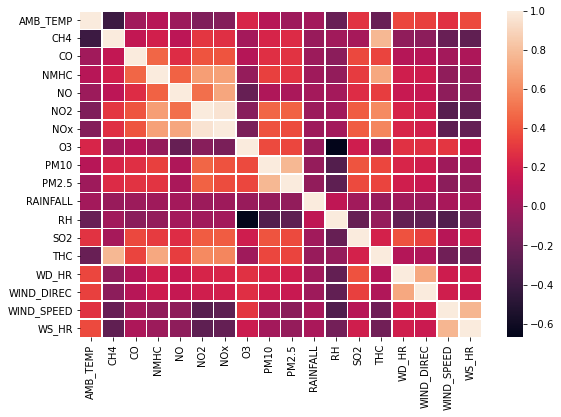

In [4]:
'--------------------Observe the relation--------------------'''

'''Step1: create a dataframe'''
new_frame = pd.DataFrame(np.zeros([24*240, 18]), columns=column) # 240 days
for i in column:
    data = train_data[train_data["observation"]==i]
    data[data == 'NR'] = '0'
    del data["observation"]
    data = np.array(data)
    data = data.astype('float') # str -> float
    data = data.reshape(1,24*240)
    data = data.T
    new_frame[i] = data 
    
# 数据归一化  ？？？？？
# print(X_Train)
# ss = StandardScaler()
# ss.fit(new_frame)
# X_Train = ss.transform(new_frame)
# print(dataTrain[1:10])

'''Step2: using heatmap'''
# fig = plt.figure(figsize=(9, 6))
# ax = fig.add_subplot()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(new_frame.corr(), fmt="d", linewidths=0.5, ax=ax)
# plt.show()

# From the heatmap, we found that PM2.5,PM10 and NO2 has the most strong relation of prediction with PM2.5
# So we choose these three features to create the model


In [7]:
# PM2.5, PM10, NO2 !!!!!!!!!!!!!!!!
'''--------------------Create model--------------------'''
# Train the model with first 9 hours every day, then check it with the PM2.5 in the tenth hour
# we assume the model will be relative with the three features mentioned above
# Y = b + W1X1 + W2X2 + ...... + W27X27
def linerModel():
    learning_rate = 0.0001
    b = 0.0001
    parameters=[0.001]*27 # all the Ws
    loss_history=[]
    mydict={0:8,1:8,2:8,3:8,4:8,5:8,6:8,7:8,8:8,9:9,10:9,11:9,12:9,13:9,14:9,15:9,16:9,17:9,18:6,19:6,20:6,21:6,22:6,23:6,24:6,25:6,26:6}
    iteration_count = 100 #迭代次数
    sample = 100
    for i in range(iteration_count):
        # initial bias gradient and weight gradient
        b_grad=0
        w_grad=[0]*27
        loss = 0
        for k in range(3600):
            oneDay = dataTrain[k]
            partsum = b+parameters[0]*float(oneDay.iloc[8,0])+ parameters[1]*float(oneDay.iloc[8,1])+\
                      parameters[2]*float(oneDay.iloc[8,2])+ parameters[3]*float(oneDay.iloc[8,3])+ \
                      parameters[4]*float(oneDay.iloc[8,4])+ parameters[5]*float(oneDay.iloc[8,5])+ \
                      parameters[6]*float(oneDay.iloc[8,6])+ parameters[7]*float(oneDay.iloc[8,7])+ \
                      parameters[8]*float(oneDay.iloc[8,8])+ parameters[9]*float(oneDay.iloc[9,0])+ \
                      parameters[10]*float(oneDay.iloc[9,1])+ parameters[11]*float(oneDay.iloc[9,2])+ \
                      parameters[12]*float(oneDay.iloc[9,3])+ parameters[13]*float(oneDay.iloc[9,4])+ \
                      parameters[14]*float(oneDay.iloc[9,5])+ parameters[15]*float(oneDay.iloc[9,6])+ \
                      parameters[16]*float(oneDay.iloc[9,7])+ parameters[17]*float(oneDay.iloc[9,8])+ \
                       parameters[18]*float(oneDay.iloc[5,0])+ parameters[19]*float(oneDay.iloc[5,1])+ \
                       parameters[20]*float(oneDay.iloc[5,2])+ parameters[21]*float(oneDay.iloc[5,3])+ \
                       parameters[22]*float(oneDay.iloc[5,4])+ parameters[23]*float(oneDay.iloc[5,5])+ \
                       parameters[24]*float(oneDay.iloc[5,6])+ parameters[25]*float(oneDay.iloc[5,7])+ \
                       parameters[26]*float(oneDay.iloc[5,8])- float(dataLabel[k])
            loss = loss + partsum * partsum
            b_grad = b_grad + partsum

            for j in range(27):
                w_grad[j] = w_grad[j] + partsum * float(day.iloc[mydict[j],j % 9])

        loss_history.append(loss/2) # L2 error

        # update b and w
        b = b - learning_rate * (b_grad/sample)
        for t in range(27):
            parameters[t] = parameters[t] - learning_rate * (w_grad[t]/sample)
            
    
    # print("loss_history: ", loss_history)       
    print("Finish training")
    return b, parameters


In [6]:
'''--------------------Test model--------------------'''

test_data = pd.read_csv('./test.csv')
result_data = pd.read_csv('./answer.csv')
# print(result_data)
del test_data["a"]
del test_data["b"]
day_data = []
check_data = []
items=18

for i in range(int(len(test_data)/items)):
    day = test_data[i*items:(i+1)*items] # data of a day
    day_data.append(day)

# print(result_data.iloc[239,1])
for j in range(len(result_data)):
    check_data.append(result_data.iloc[j,1])

# from model:
# b=-3.661720707499184e+104
# parameters=[-6.2249252027486e+105, -8.055785556498203e+105, -4.0278927782491017e+105, -5.858753131998695e+105, -1.8308603537495841e+105, -4.3940648489990224e+105, -2.5632044952494347e+105, -6.957269344248431e+105, -6.2249252027486e+105, -2.1970324244995112e+105, -3.661720707499184e+104, -3.661720707499184e+104, -3.661720707499184e+104, 0.001, 0.001, 0.001, -7.323441414998368e+104, -7.323441414998368e+104, -3.625103500424187e+105, -3.6617207074991683e+105, -1.9773291820495452e+105, -2.416735666949449e+105, -1.6843915254496213e+105, -1.6477743183746393e+105, -1.757625939599606e+105, -2.965993773074331e+105, -3.2955486367492786e+105]

b,parameters = linerModel()
# print(b)
# print(parameters)

predict=[]

for i in range(len(day_data)):
    day=day_data[i]
    p=b+parameters[0]*float(day.iloc[8,0])+parameters[1]*float(day.iloc[8,1])+\
    parameters[2]*float(day.iloc[8,2])+parameters[3]*float(day.iloc[8,3])+\
    parameters[4]*float(day.iloc[8,4])+parameters[5]*float(day.iloc[8,5])+\
    parameters[6]*float(day.iloc[8,6])+parameters[7]*float(day.iloc[8,7])+\
    parameters[8]*float(day.iloc[8,8])+parameters[9]*float(day.iloc[9,0])+\
    parameters[10]*float(day.iloc[9,1])+parameters[11]*float(day.iloc[9,2])+\
    parameters[12]*float(day.iloc[9,3])+parameters[13]*float(day.iloc[9,4])+\
    parameters[14]*float(day.iloc[9,5])+parameters[15]*float(day.iloc[9,6])+\
    parameters[16]*float(day.iloc[9,7])+parameters[17]*float(day.iloc[9,8])+\
    parameters[18]*float(day.iloc[5,0])+parameters[19]*float(day.iloc[5,1])+\
    parameters[20]*float(day.iloc[5,2])+parameters[21]*float(day.iloc[5,3])+\
    parameters[22]*float(day.iloc[5,4])+parameters[23]*float(day.iloc[5,5])+\
    parameters[24]*float(day.iloc[5,6])+parameters[25]*float(day.iloc[5,7])+\
    parameters[26]*float(day.iloc[5,8])
    predict.append(p)

def evaluate(test,predict):
    sumLoss=0
    for i in range(1,len(predict)):
        sumLoss = sumLoss + math.pow((float(test[i])-float(predict[i])),2)
        print(sumLoss/i)
    # return sumLoss/i


evaluate(check_data,predict)
# print(loss_history[len(loss_history)-1])

loss_history:  [1503239.2668044772, 1127981072.4394534, 1045527438224.906, 969899577752027.6, 8.997261940969614e+17, 8.346304346631853e+20, 7.74244379491072e+23, 7.182272951738723e+26, 6.662630833187255e+29, 6.1805851598305196e+32, 5.73341580440565e+35, 5.3185994426310586e+38, 4.933795314377681e+41, 4.5768320150338685e+44, 4.2456952425237076e+47, 3.938516430836267e+50, 3.6535622059266592e+53, 3.389224604489309e+56, 3.1440120004094186e+59, 2.916540687691559e+62, 2.7055270723689094e+65, 2.509780429332776e+68, 2.3281961832104576e+71, 2.1597496753756856e+74, 2.003490381920159e+77, 1.858536549958444e+80, 1.7240702219997468e+83, 1.5993326203096206e+86, 1.483619865216149e+89, 1.3762790031993832e+92, 1.2767043223511518e+95, 1.1843339344137163e+98, 1.0986466041101767e+101, 1.0191588078748518e+104, 9.454220053864777e+106, 8.770201085077132e+109, 8.135671333485127e+112, 7.547050222042832e+115, 7.001016230781959e+118, 6.494488153863839e+121, 6.024607712695816e+124, 5.588723427000169e+127, 5.184375